# Exploratory Data Analysis (EDA)

This notebook is used for exploratory data analysis. It requires data to have been downloaded from s3 into the `data/raw` directory.

**Contents:**
1. Basic Overview of Datasets
2. Data Transformation (future)

**Last Updated:** 2025-10-19 \
**Author:** Wiebke Hutiri

In [86]:
from docutils.nodes import title
# Notebook Configuration and Imports

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

from ds_code_challenge.data import load_data
from ds_code_challenge.data import eda as eda

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Basic Overview of Datasets

In [2]:
# Load datasets

sr_df = load_data('sr.csv.gz')
sr_hex_df = load_data('sr_hex.csv.gz')
sr_hex_trunc_df = load_data('sr_hex_truncated.csv')
hex8_df = load_data('city-hex-polygons-8.geojson')

### Service Requests (sr.csv.gz)

Explore the service requests dataset, which contains the most important information for future predictive analysis.

#### Data Quality
- `cause_code_group` and `cause_code` are the columns with the most missing values.
- `reference_number` is missing for ~37 % of records and duplicate for 6023 records (excluding nan values).
- ~22.5 % of records are missing `official_suburb`, `latitude` and `longitude` information.

#### Insights
- Service requests span across 12 `directorate`s with 20 `department`s.
- Most service requests are assigned to the WATER AND SANITATION directorate (422834 requests), followed by the ENERGY directorate (278117 requests).
- The suburbs with the most service requests are PHILIPPI (24647 requests), followed by GUGULETU (14108 requests).

##### Service Request Codes
- Service requests are categorised into 492 `code`s, belonging to 38 `code_group`s.
- The most frequent code groups are ELECTRICITY TECHNICAL COMPLAINTS (241017 requests), followed by SEWER (150549 requests).
- The most frequent codes are Sewer: Blocked/Overflow (134429 requests), followed by No Power (106601 requests).

##### Service Request Causes
- There are 182 `cause_code`s, belonging to 43 `cause_code_group`s
- The most frequent cause code groups are General (78197 requests), followed by Point of Supply (23824 requests).
- The most frequent cause codes are Foreign Objects (25030 requests), followed by None/Private (11250 requests).

In [66]:
# Get basic dataset information
eda.basic_overview(sr_df)

Basic dataset overview:
Rows: 941634 | Columns: 15

Column names: ['notification_number', 'reference_number', 'creation_timestamp', 'completion_timestamp', 'directorate', 'department', 'branch', 'section', 'code_group', 'code', 'cause_code_group', 'cause_code', 'official_suburb', 'latitude', 'longitude']

<class 'pandas.core.frame.DataFrame'>
Index: 941634 entries, 173324 to 941326
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   notification_number   941634 non-null  int64  
 1   reference_number      592920 non-null  float64
 2   creation_timestamp    941634 non-null  object 
 3   completion_timestamp  929442 non-null  object 
 4   directorate           932199 non-null  object 
 5   department            932180 non-null  object 
 6   branch                913233 non-null  object 
 7   section               848509 non-null  object 
 8   code_group            941634 non-null  object 
 9   code 

Percentage missing values per dataset column

notification_number      0.000000
reference_number        37.032860
creation_timestamp       0.000000
completion_timestamp     1.294771
directorate              1.001982
department               1.003999
branch                   3.016140
section                  9.889724
code_group               0.000000
code                     0.000000
cause_code_group        86.075588
cause_code              86.229363
official_suburb         22.557915
latitude                22.552712
longitude               22.552712
dtype: float64


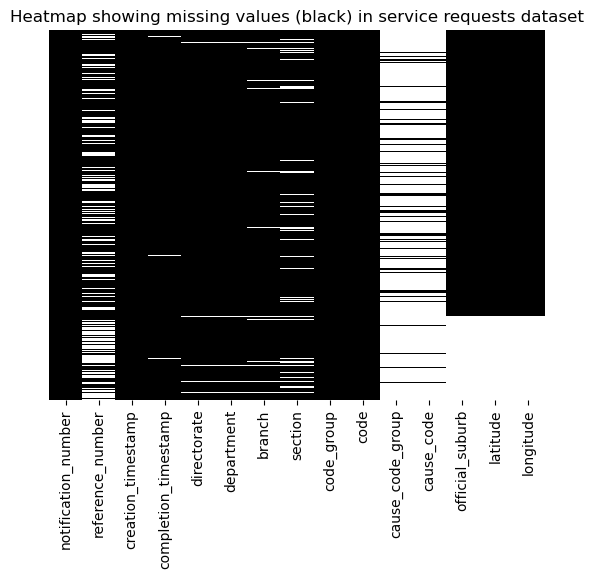

In [67]:
# Check missing values
print('Percentage missing values per dataset column\n')
print(sr_df.isnull().sum() / len(sr_df) * 100)  # Percentage

# Visualize missing values with heatmap
sns.heatmap(sr_df.sort_values(by='official_suburb').isnull(), cbar=False, yticklabels=False, cmap='gray')
plt.title('Heatmap showing missing values (black) in service requests dataset')
plt.show()

In [89]:
# Check duplicate rows
print(f"Duplicate rows: {sr_df.duplicated().sum()}")

# Check duplicates in specific columns
eda.check_duplicates(sr_df, ['reference_number'])
eda.check_duplicates(sr_df, ['reference_number', 'official_suburb'])
eda.check_duplicates(sr_df, ['reference_number', 'code_group'])

Duplicate rows: 0
Duplicate values in ['reference_number']: 6023
Duplicate values in ['reference_number', 'official_suburb']: 2216
Duplicate values in ['reference_number', 'code_group']: 4797


In [64]:
# Identify potential categorical columns
categorical_cols = sr_df.select_dtypes(include=['object']).columns
numerical_cols = sr_df.select_dtypes(include=[np.number]).columns

print(f"Categorical: {categorical_cols.tolist()}\n")
print(f"Numerical: {numerical_cols.tolist()}\n")

# Check unique values
for col in sr_df.columns:
    print(f"{col}: {sr_df[col].nunique()} unique values")

Categorical: ['creation_timestamp', 'completion_timestamp', 'directorate', 'department', 'branch', 'section', 'code_group', 'code', 'cause_code_group', 'cause_code', 'official_suburb']

Numerical: ['notification_number', 'reference_number', 'latitude', 'longitude']

notification_number: 941634 unique values
reference_number: 589724 unique values
creation_timestamp: 895979 unique values
completion_timestamp: 899486 unique values
directorate: 12 unique values
department: 20 unique values
branch: 39 unique values
section: 86 unique values
code_group: 38 unique values
code: 492 unique values
cause_code_group: 43 unique values
cause_code: 182 unique values
official_suburb: 775 unique values
latitude: 455963 unique values
longitude: 452396 unique values


In [57]:
# Get the top 2 values for each categorical column

for col in categorical_cols:
    print(f'{sr_df[col].value_counts()[:2]}\n')

creation_timestamp
2020-11-03 08:50:14+02:00    9
2020-11-04 09:20:02+02:00    8
Name: count, dtype: int64

completion_timestamp
2020-06-16 12:07:54+02:00    83
2020-08-11 12:21:47+02:00    41
Name: count, dtype: int64

directorate
WATER AND SANITATION    422834
ENERGY                  278117
Name: count, dtype: int64

department
Electricity Generation and Distribution    278117
Distribution Services                      263829
Name: count, dtype: int64

branch
Reticulation                   249234
Enterprise Asset Management    173976
Name: count, dtype: int64

section
Reticulation WW Conveyance         124392
Reticulation Water Distribution     88839
Name: count, dtype: int64

code_group
ELECTRICITY TECHNICAL COMPLAINTS    241017
SEWER                               150549
Name: count, dtype: int64

code
Sewer: Blocked/Overflow    134429
No Power                   106601
Name: count, dtype: int64

cause_code_group
General            78197
Point of Supply    23824
Name: count, dtype: i

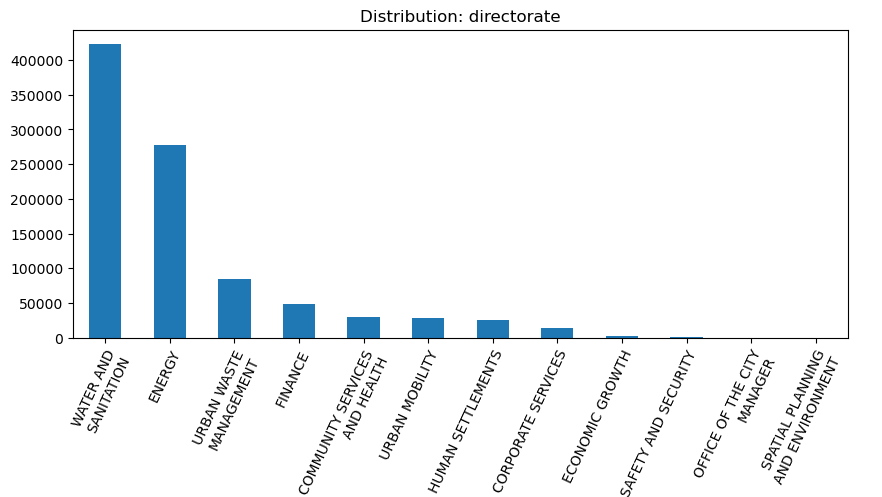

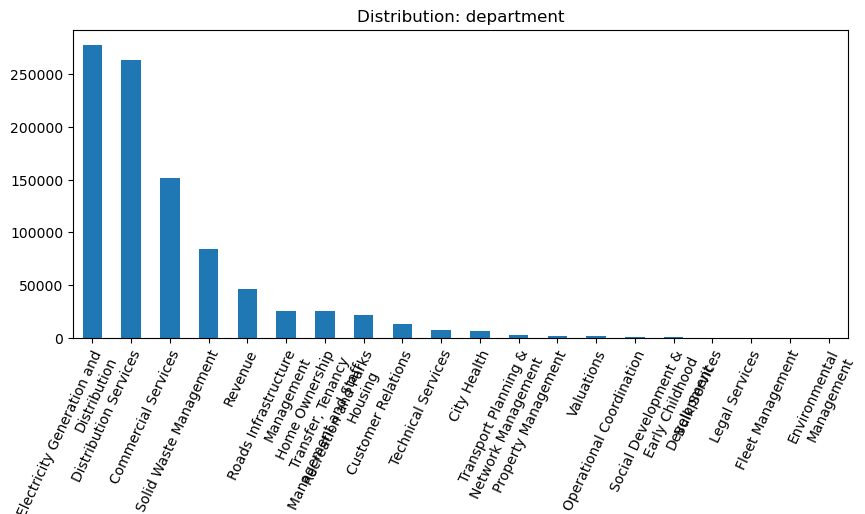

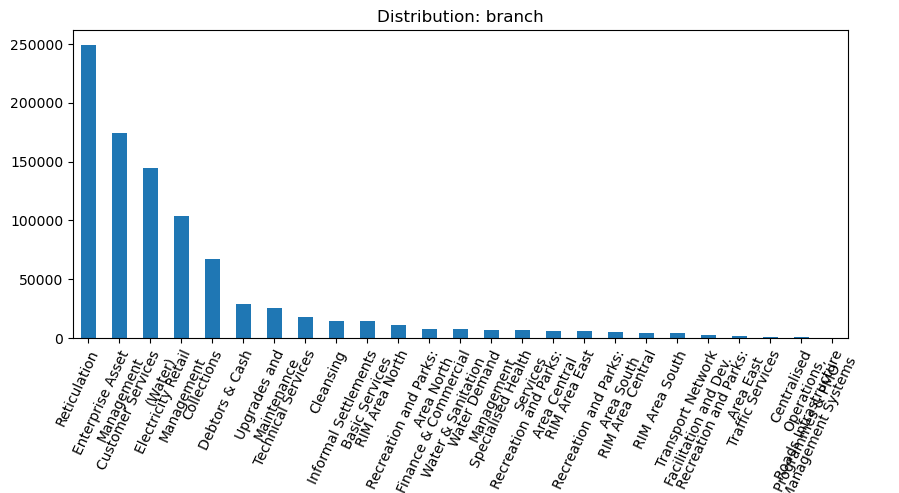

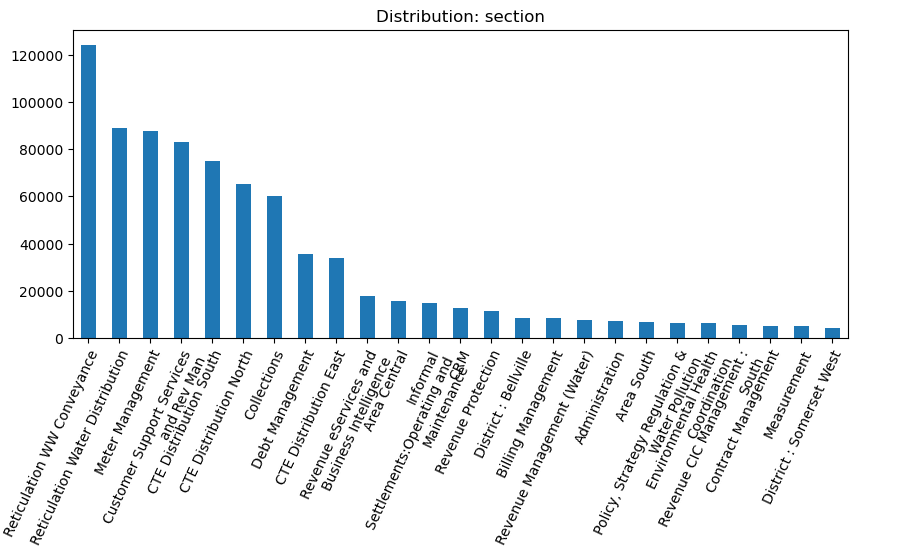

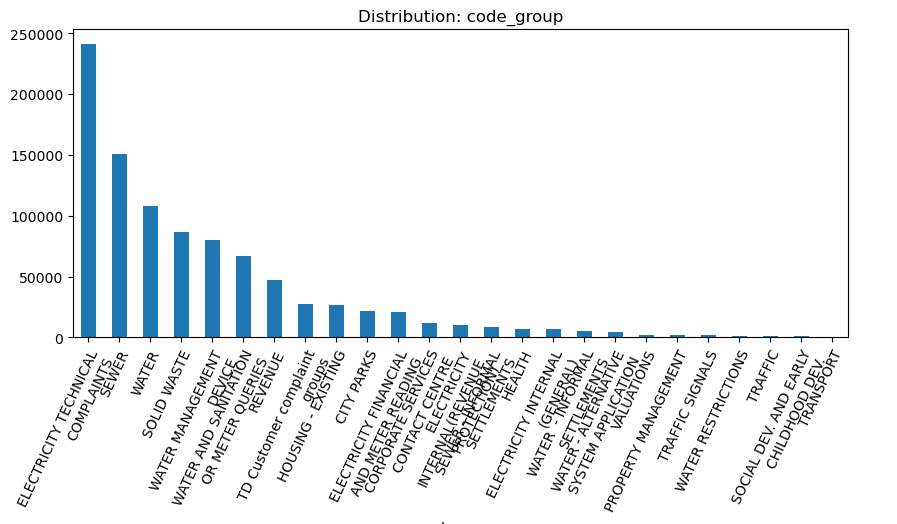

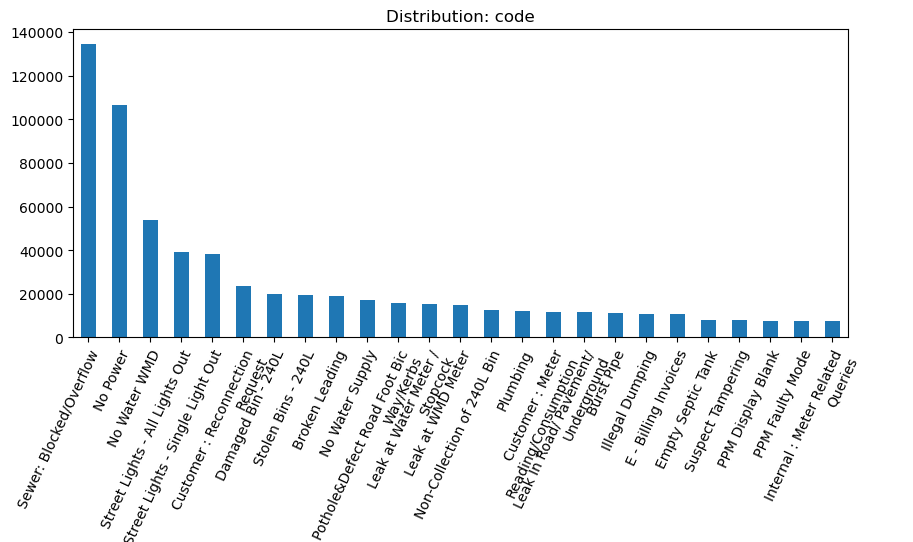

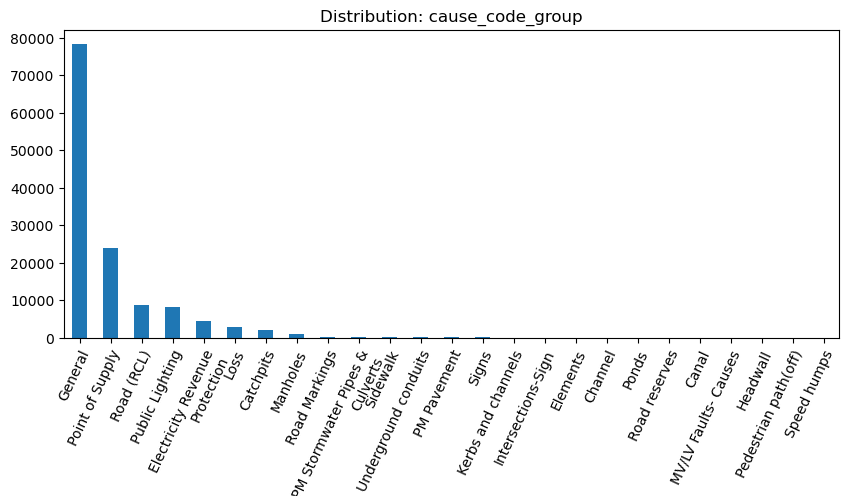

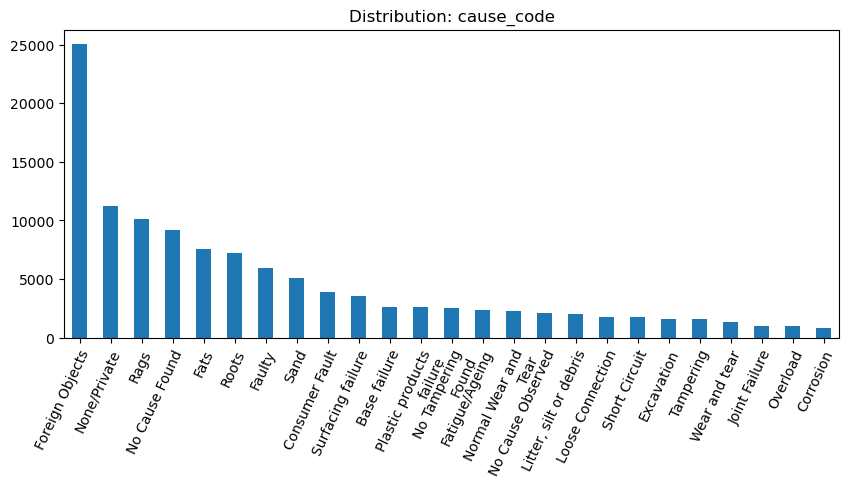

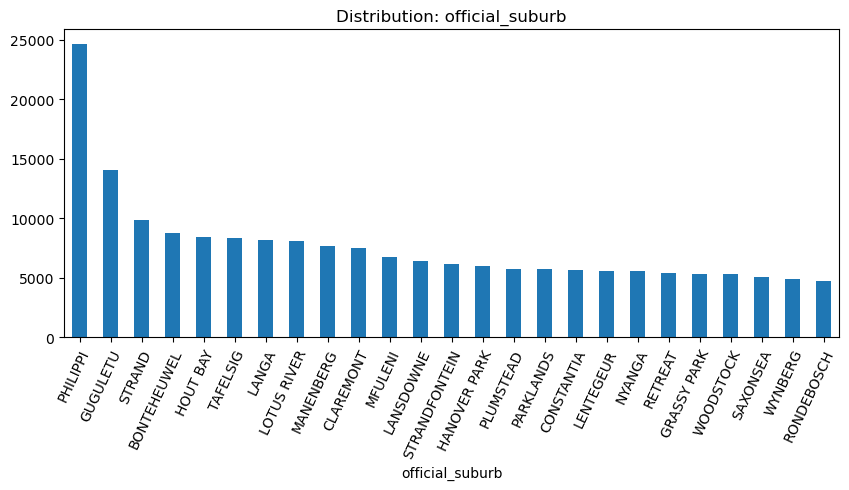

In [21]:
# Examine all categorical features
for col in categorical_cols[2::]: # skip creation_timestamp and completion_timestamp columns
    plt.figure(figsize=(10, 4))
    sr_df[col].value_counts()[:25].plot(kind='bar')
    plt.title(f'Distribution: {col}')
    plt.xticks(rotation=65, wrap=True, ha='right')
    plt.show()

### City Hex Polygons 8 (city-hex-polygons-8)

Explore the hex 8 polygons dataset, which will be joined with the service requests.

#### Data Quality

No data quality issues have been observed.


In [90]:
basic_overview(hex8_df)

Basic dataset overview:
Rows: 3832 | Columns: 4

Column names: ['index', 'centroid_lat', 'centroid_lon', 'geometry']

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3832 entries, 0 to 3831
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   index         3832 non-null   object  
 1   centroid_lat  3832 non-null   float64 
 2   centroid_lon  3832 non-null   float64 
 3   geometry      3832 non-null   geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 119.9+ KB
None
       centroid_lat  centroid_lon
count   3832.000000   3832.000000
mean     -33.898135     18.595304
std        0.207247      0.164714
min      -34.360866     18.303605
25%      -34.059522     18.461158
50%      -33.920295     18.567492
75%      -33.725016     18.706488
max      -33.468049     19.006807
             index  centroid_lat  centroid_lon  \
0  88ad361801fffff    -33.859427     18.677843   
1  88ad361803fffff    -33.

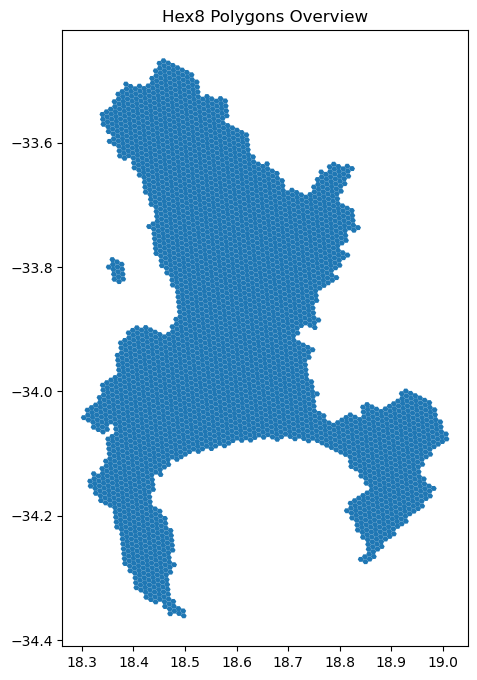

In [93]:
# Simple plot
hex8_df.plot(figsize=(12, 8))
plt.title('Hex8 Polygons Overview')
plt.show()

In [94]:
# Check for invalid geometries
print(f"Invalid geometries: {(~hex8_df.geometry.is_valid).sum()}")

# Check for empty geometries
print(f"Empty geometries: {hex8_df.geometry.is_empty.sum()}")


Invalid geometries: 0
Empty geometries: 0


## Data Transformations

TODO: Explore service records that failed to pass join validation.